# A Good Dashboard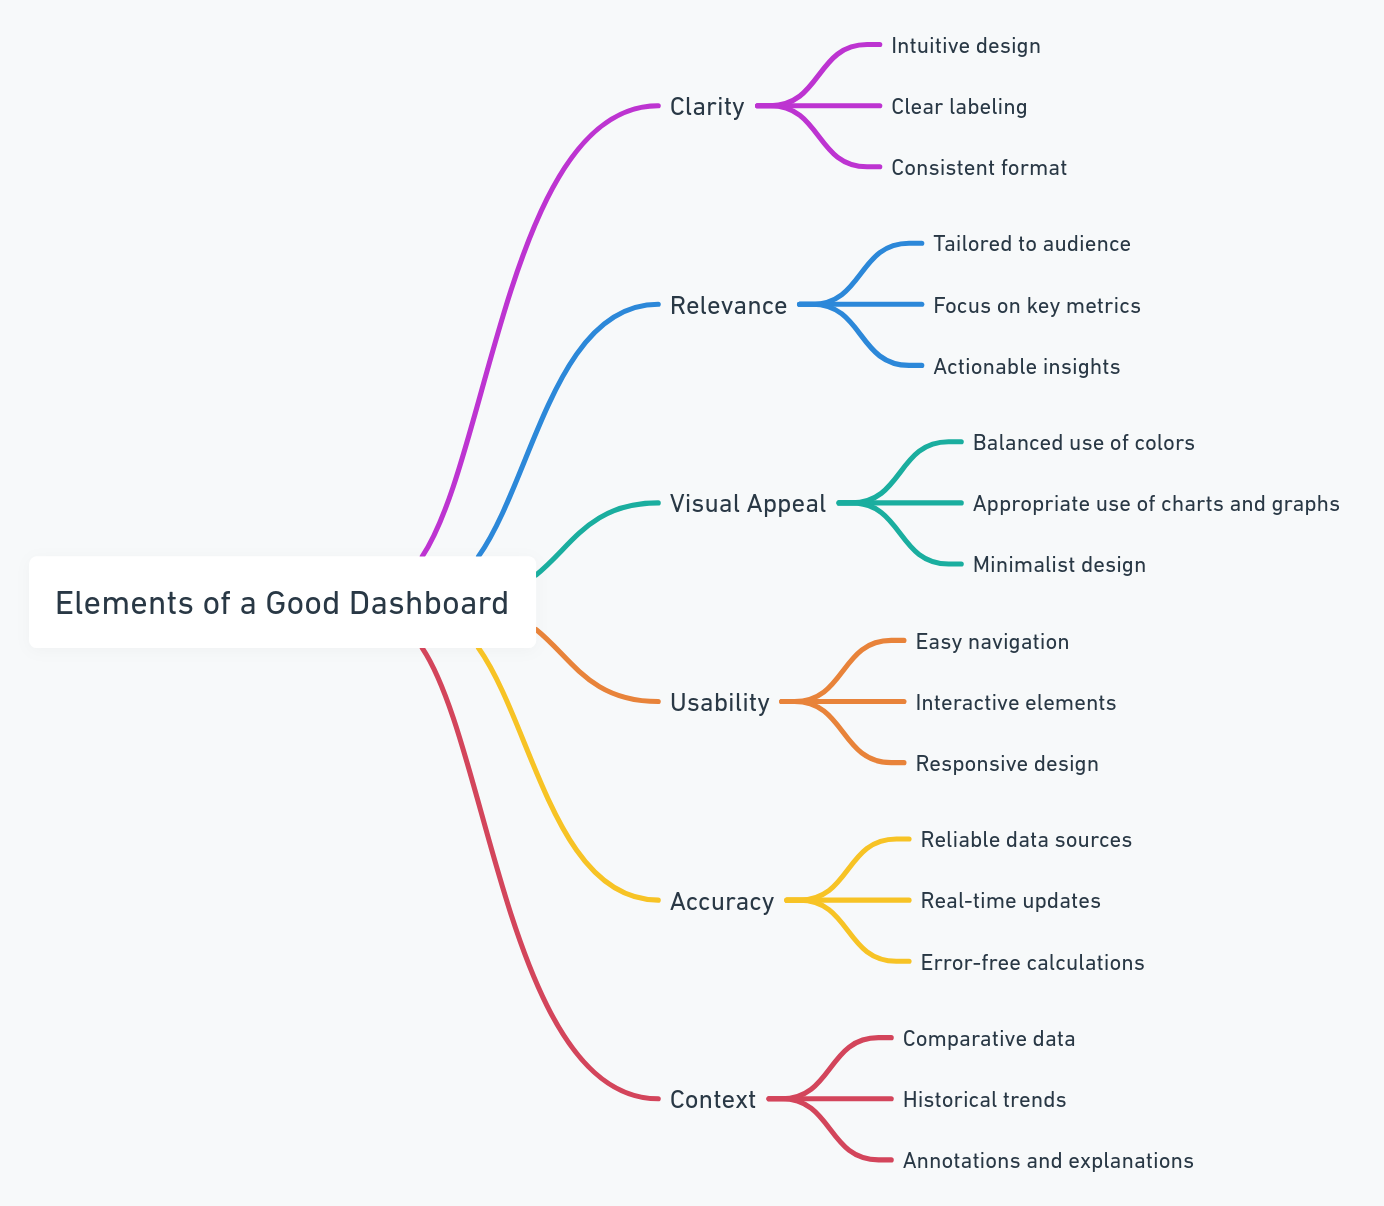

# Streamlit - Apps? Or Dashboarding?

## Installation



```
pip install streamlit
streamlit hello
```



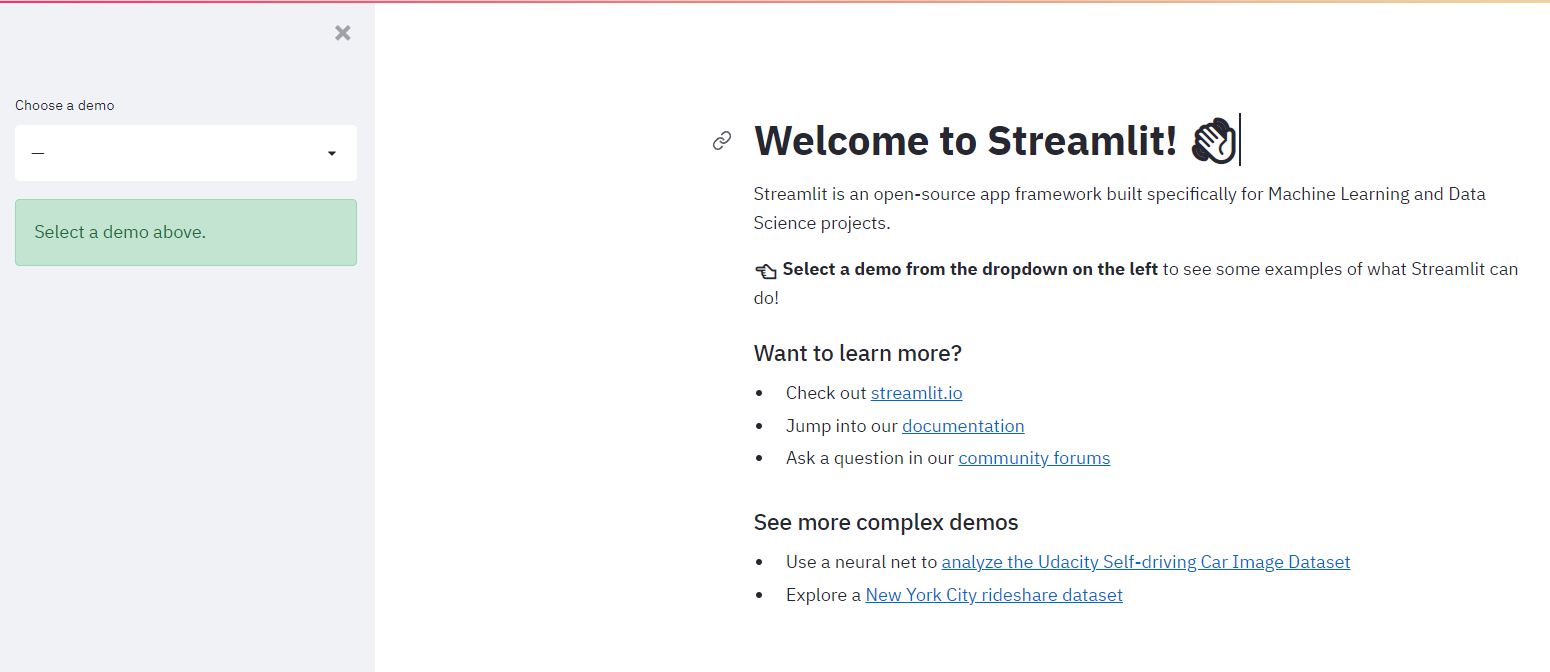

## Running your scripts



```
# Running
python -m streamlit run your_script.py

# is equivalent to:
streamlit run your_script.py
```

Why is this equivalent? **HOMEWORK**


## Display texts with Streamlit

**st.write():** This function is used to add anything to a web app, from formatted string to charts in matplotlib figure, Altair charts, plotly figure, data frame, Keras model, and others.

In [ ]:
# write_hello.py
# streamlit run write_hello.py
import streamlit as st
st.write("Hello ,let's learn how to build a streamlit app together")

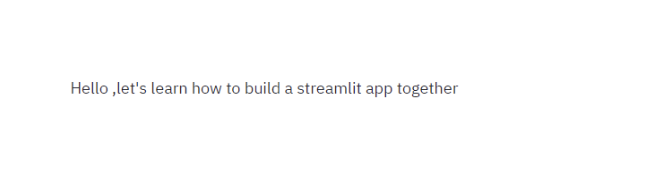

* **st.title():** This function allows you to add the title of the app.
* **st.header():** This function is used to set header of a section.
* **st.markdown():** This function is used to set a markdown of a section.
* **st.subheader():** This function is used to set sub-header of a section.
* **st.caption():** This function is used to write caption.
* **st.code():** This function is used to set a code.
* **st.latex():** This function is used to display mathematical expressions formatted as LaTeX.

In [ ]:
st.title ("this is the app title")
st.header("this is the header")
st.markdown("this is the markdown")
st.subheader("this is the subheader")
st.caption("this is the caption")
st.code("x=2021")
st.latex(r''' a+a r^1+a r^2+a r^3 ''')

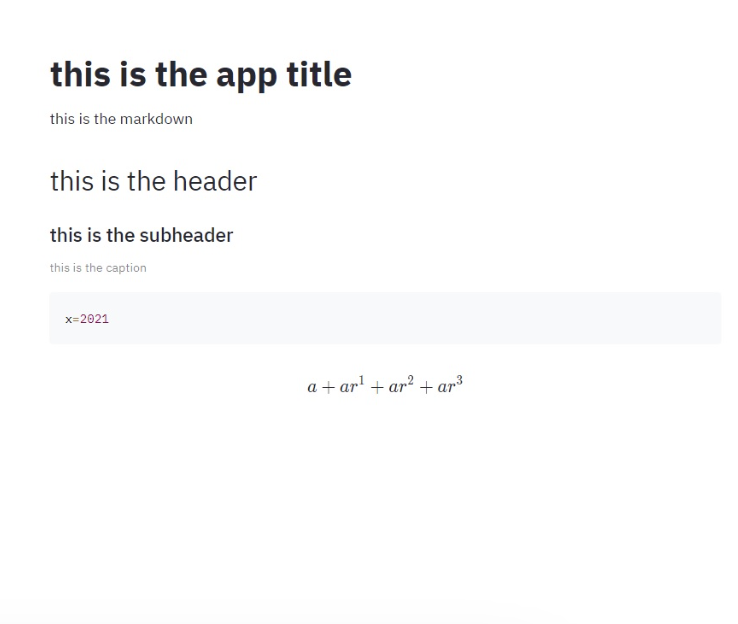

## Input widgets


In [ ]:
st.checkbox('yes')
st.button('Click')
st.radio('Pick your gender',['Male','Female'])
st.selectbox('Pick your gender',['Male','Female'])
st.multiselect('choose a planet',['Jupiter', 'Mars', 'neptune'])
st.select_slider('Pick a mark', ['Bad', 'Good', 'Excellent'])
st.slider('Pick a number', 0,50)

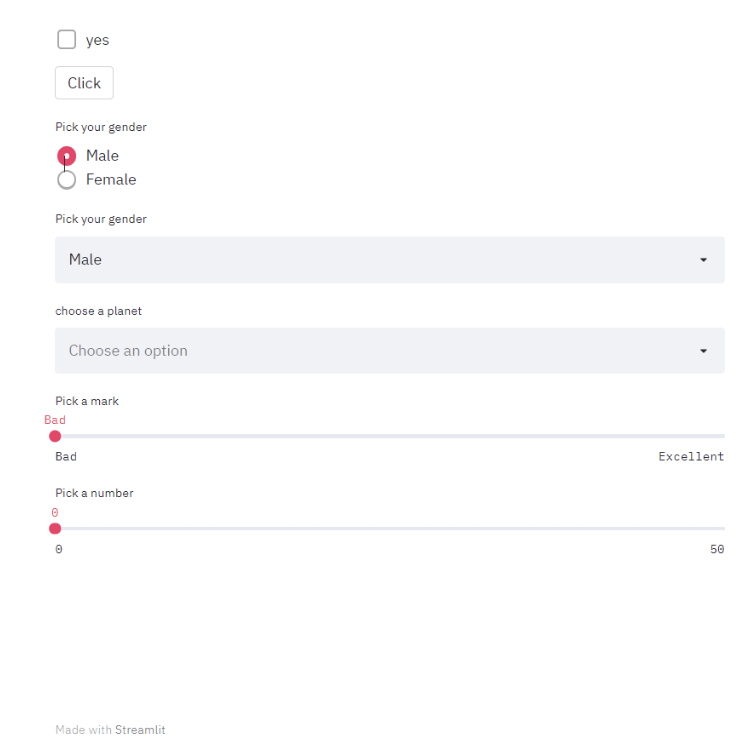

In [ ]:
st.number_input('Pick a number', 0,10)
st.text_input('Email address')
st.date_input('Travelling date')
st.time_input('School time')
st.text_area('Description')
st.file_uploader('Upload a photo')
st.color_picker('Choose your favorite color')

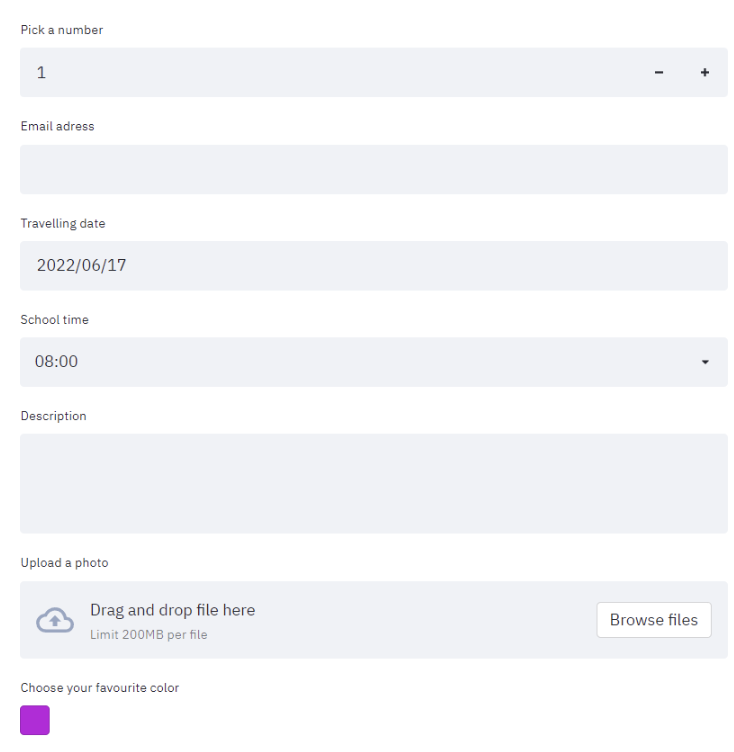

## Display progress and status with Streamlit

In [ ]:
import time

st.balloons()
st.subheader("Progress Bar")
st.progress(10)
with st.spinner('Wait for it...'):
      time.sleep(10)

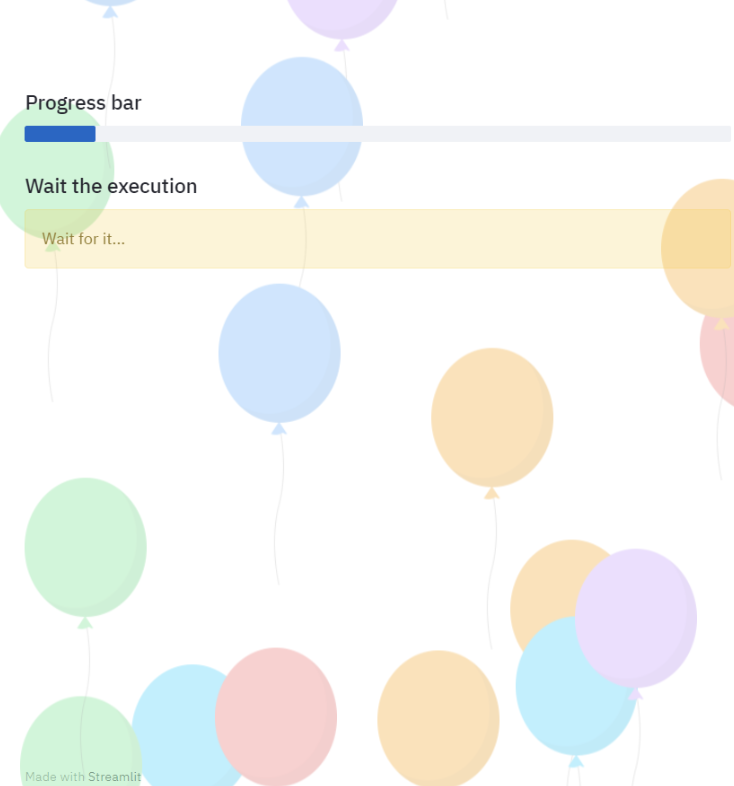

In [ ]:
st.success("You did it !")
st.error("Error")
st.warnig("Warning")
st.info("It's easy to build a streamlit app")
st.exception(RuntimeError("RuntimeError exception"))

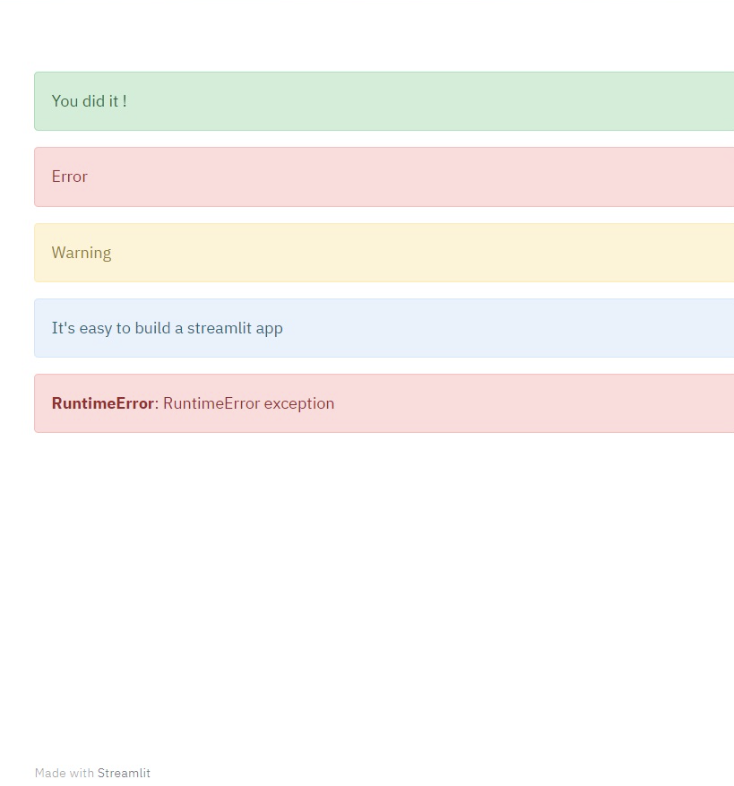

## Sidebar

In [ ]:
st.sidebar.title("This is written inside the sidebar")
st.sidebar.button("click")
st.sidebar.radio("Pick your gender", ["Male", "Female"] )

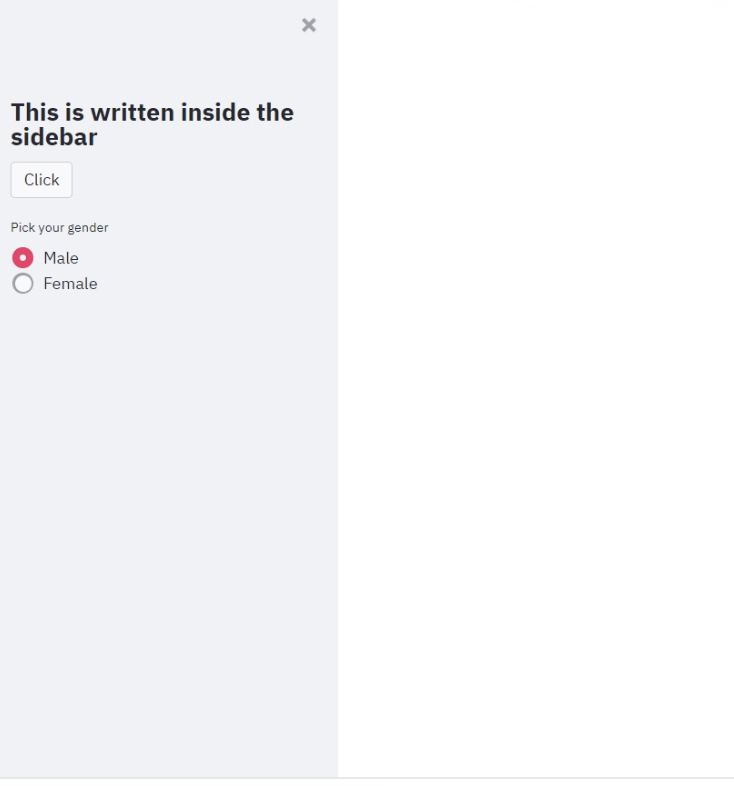

## Display graphs with Streamlit


In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
rand=np.random.normal(1, 2, size=20)
fig, ax = plt.subplots()
ax.hist(rand, bins=15)
st.pyplot(fig)

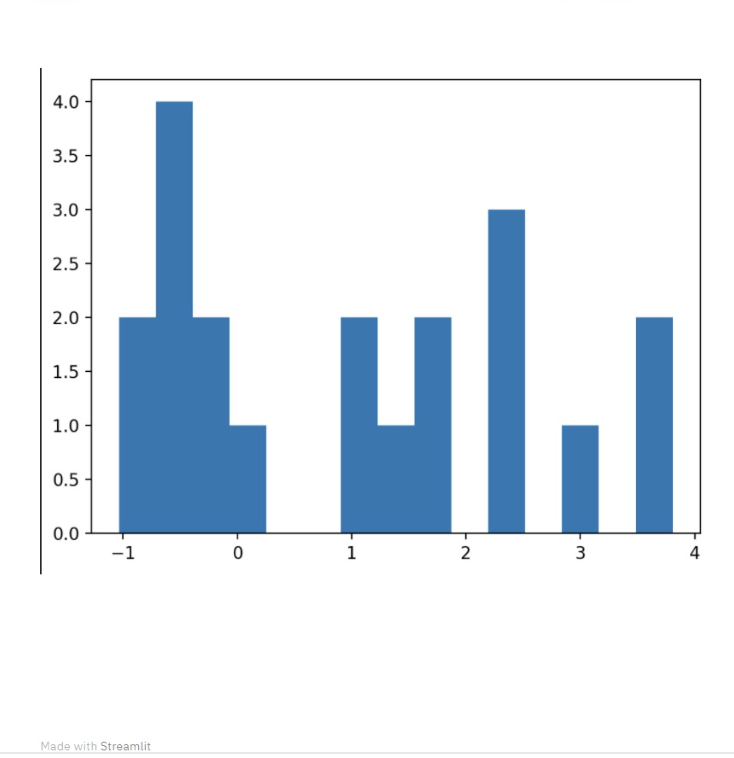

In [ ]:
# Streamlit = foundational level MERN stack

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
df = pd.DataFrame(
        np.random.randn(10, 2),
        columns=['x', 'y'])
st.bar_chart(df)

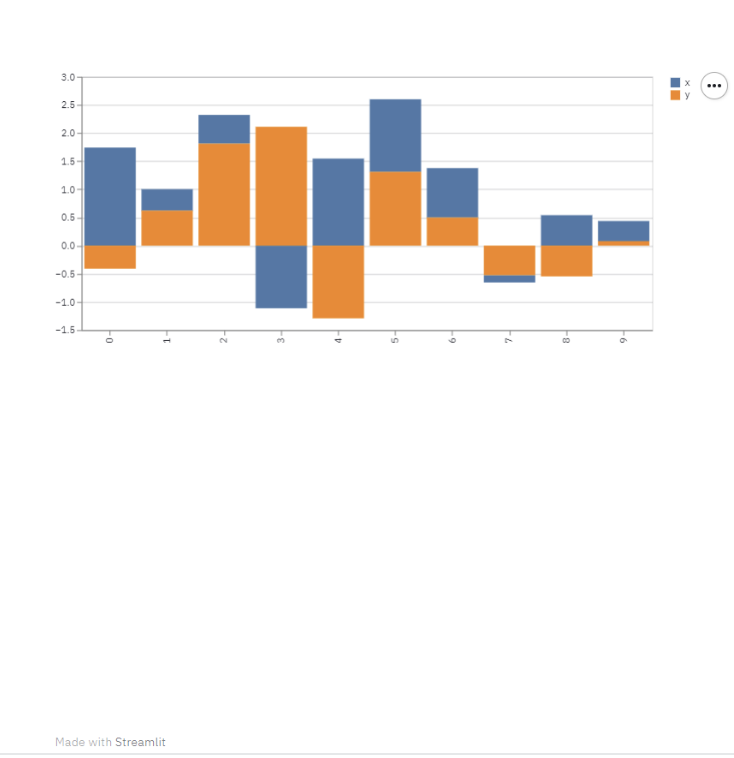

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
df= pd.DataFrame(
        np.random.randn(10, 2),
        columns=['x', 'y'])
st.area_chart(df)

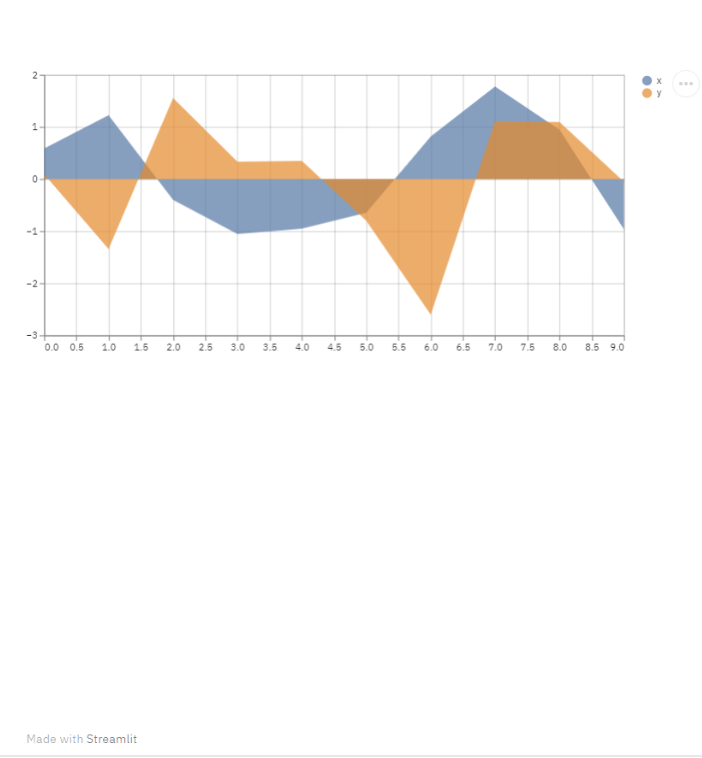

## Display maps with Streamlit

In [ ]:
# geoJSON
# geopandas

In [ ]:
import pandas as pd
import numpy as np
import streamlit as st
df = pd.DataFrame(np.random.randn(500, 2) / [50, 50] + [37.76, -122.4],columns=['lat', 'lon'])
st.map(df)

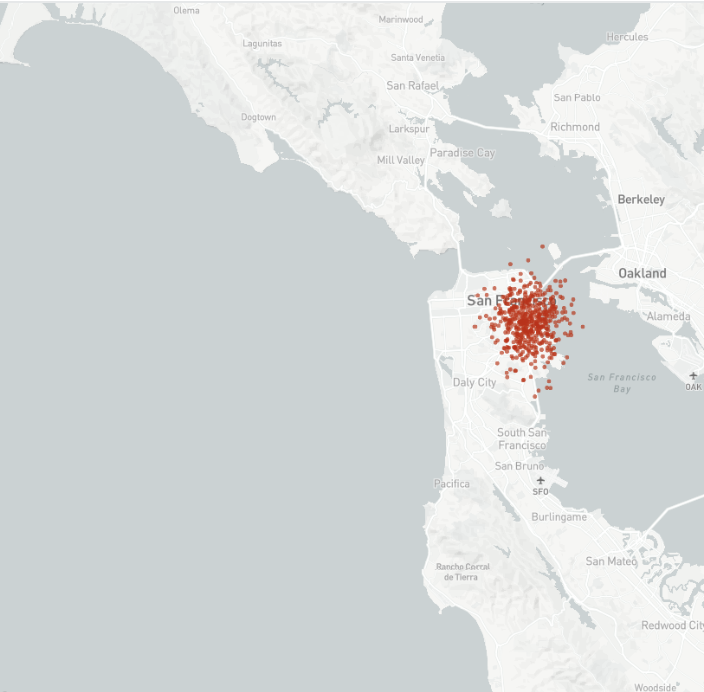

# Streamlit Recommendations

* https://30days.streamlit.app/
* https://bgremoval.streamlit.app/
* https://zero-shot-text-classifier.streamlit.app/


---







* https://github.com/i008/COCO-dataset-explorer
* https://github.com/robmarkcole/mqtt-camera-streamer

# Gradio

In [ ]:
! pip install gradio

## Quickstart!

In [ ]:
import gradio as gr

def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch()

## The Interface `Class`

The `Interface` class is designed to create quick demos for machine learning models which accept one or more inputs, and return one or more outputs.

The `Interface` class has three core arguments:

* `fn`: the function to wrap a user interface (UI) around
* `inputs`: the Gradio component(s) to use for the input. The number of components should match the number of arguments in your function.
* `outputs`: the Gradio component(s) to use for the output. The number of components should match the number of return values from your function.

## Sharing your demo

In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="textbox", outputs="textbox")

demo.launch(share=True)  # Share your demo with just 1 extra parameter 🚀

## Image Outputs

In [ ]:
import gradio as gr
import numpy as np
import time

def fake_diffusion(steps):
    rng = np.random.default_rng()
    for i in range(steps):
        time.sleep(1)
        image = rng.random(size=(600, 600, 3))
        yield image
    image = np.ones((1000,1000,3), np.uint8)
    image[:] = [255, 124, 0]
    yield image


demo = gr.Interface(fake_diffusion,
                    inputs=gr.Slider(1, 10, 3, step=1),
                    outputs="image")

demo.launch()

**https://www.gradio.app/playground**

# How to Create a Chatbot with Gradio

### Random Yes or No

In [ ]:
import random

def random_response(message, history):
    return random.choice(["Yes", "No"])

In [ ]:
import gradio as gr

gr.ChatInterface(random_response).launch()

### Using Open AI

In [ ]:
from openai import OpenAI
import gradio as gr

api_key = "sk-..."  # Replace with your key
client = OpenAI(api_key=api_key)

def predict(message, history):
    history_openai_format = []
    for human, assistant in history:
        history_openai_format.append({"role": "user", "content": human })
        history_openai_format.append({"role": "assistant", "content":assistant})
    history_openai_format.append({"role": "user", "content": message})

    response = client.chat.completions.create(model='gpt-3.5-turbo',
    messages= history_openai_format,
    temperature=1.0,
    stream=True)

    partial_message = ""
    for chunk in response:
        if chunk.choices[0].delta.content is not None:
              partial_message = partial_message + chunk.choices[0].delta.content
              yield partial_message

gr.ChatInterface(predict).launch()

### Using OpenSource LLMs

*GPU required*

In [ ]:
import gradio as gr
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, StoppingCriteria, StoppingCriteriaList, TextIteratorStreamer
from threading import Thread

tokenizer = AutoTokenizer.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1")
model = AutoModelForCausalLM.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1", torch_dtype=torch.float16)
model = model.to('cuda:0')

class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = [29, 0]
        for stop_id in stop_ids:
            if input_ids[0][-1] == stop_id:
                return True
        return False

def predict(message, history):
    history_transformer_format = history + [[message, ""]]
    stop = StopOnTokens()

    messages = "".join(["".join(["\n<human>:"+item[0], "\n<bot>:"+item[1]])
                for item in history_transformer_format])

    model_inputs = tokenizer([messages], return_tensors="pt").to("cuda")
    streamer = TextIteratorStreamer(tokenizer, timeout=10., skip_prompt=True, skip_special_tokens=True)
    generate_kwargs = dict(
        model_inputs,
        streamer=streamer,
        max_new_tokens=1024,
        do_sample=True,
        top_p=0.95,
        top_k=1000,
        temperature=1.0,
        num_beams=1,
        stopping_criteria=StoppingCriteriaList([stop])
        )
    t = Thread(target=model.generate, kwargs=generate_kwargs)
    t.start()

    partial_message = ""
    for new_token in streamer:
        if new_token != '<':
            partial_message += new_token
            yield partial_message

gr.ChatInterface(predict).launch()

# Plotly

https://plotly.com/python/